## Investment Outcome 

In [17]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### 1. Data initialization

In [18]:
#load the data
name = input("Enter the name of the company").upper()
name

#taking the dataset 
df = pd.read_csv(f"../data-companywise/{name}.csv")
df

Enter the name of the company shl


,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
0,2022-01-02,210.5,210.5,205.8,208.0,-0.48,18999.0,3932807.0,2022,1.95,98.4,11.5,26.3
1,2022-01-03,209.0,213.0,208.0,211.0,1.44,17758.0,3749380.5,2022,1.95,98.4,11.5,26.3
2,2022-01-04,210.0,215.3,208.0,214.0,1.42,36481.0,7770474.5,2022,1.95,98.4,11.5,26.3
3,2022-01-05,214.0,217.0,208.8,210.3,-1.73,17351.0,3707132.8,2022,1.95,98.4,11.5,26.3
4,2022-01-06,211.0,220.0,208.0,217.0,3.19,29617.0,6320346.1,2022,1.95,98.4,11.5,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2025-12-23,478.0,485.0,471.0,479.5,0.19,15466.0,7425662.4,2025,6.56,81.7,25.6,31.6
924,2025-12-24,479.5,486.0,475.0,480.5,0.21,11182.0,5374158.5,2025,6.56,81.7,25.6,31.6
925,2025-12-28,470.9,490.1,470.9,488.5,1.66,12144.0,5920904.6,2025,6.56,81.7,25.6,31.6
926,2025-12-29,485.0,493.0,480.0,488.1,-0.08,29177.0,14280950.5,2025,6.56,81.7,25.6,31.6


In [19]:
df = df[(df['year'] >= 2022 ) & (df['year'] < 2026)].copy()

In [20]:
df

,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
0,2022-01-02,210.5,210.5,205.8,208.0,-0.48,18999.0,3932807.0,2022,1.95,98.4,11.5,26.3
1,2022-01-03,209.0,213.0,208.0,211.0,1.44,17758.0,3749380.5,2022,1.95,98.4,11.5,26.3
2,2022-01-04,210.0,215.3,208.0,214.0,1.42,36481.0,7770474.5,2022,1.95,98.4,11.5,26.3
3,2022-01-05,214.0,217.0,208.8,210.3,-1.73,17351.0,3707132.8,2022,1.95,98.4,11.5,26.3
4,2022-01-06,211.0,220.0,208.0,217.0,3.19,29617.0,6320346.1,2022,1.95,98.4,11.5,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2025-12-23,478.0,485.0,471.0,479.5,0.19,15466.0,7425662.4,2025,6.56,81.7,25.6,31.6
924,2025-12-24,479.5,486.0,475.0,480.5,0.21,11182.0,5374158.5,2025,6.56,81.7,25.6,31.6
925,2025-12-28,470.9,490.1,470.9,488.5,1.66,12144.0,5920904.6,2025,6.56,81.7,25.6,31.6
926,2025-12-29,485.0,493.0,480.0,488.1,-0.08,29177.0,14280950.5,2025,6.56,81.7,25.6,31.6


In [21]:
#view first rows
df.head()

,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
0,2022-01-02,210.5,210.5,205.8,208.0,-0.48,18999.0,3932807.0,2022,1.95,98.4,11.5,26.3
1,2022-01-03,209.0,213.0,208.0,211.0,1.44,17758.0,3749380.5,2022,1.95,98.4,11.5,26.3
2,2022-01-04,210.0,215.3,208.0,214.0,1.42,36481.0,7770474.5,2022,1.95,98.4,11.5,26.3
3,2022-01-05,214.0,217.0,208.8,210.3,-1.73,17351.0,3707132.8,2022,1.95,98.4,11.5,26.3
4,2022-01-06,211.0,220.0,208.0,217.0,3.19,29617.0,6320346.1,2022,1.95,98.4,11.5,26.3


In [22]:
df.tail()

,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
923,2025-12-23,478.0,485.0,471.0,479.5,0.19,15466.0,7425662.4,2025,6.56,81.7,25.6,31.6
924,2025-12-24,479.5,486.0,475.0,480.5,0.21,11182.0,5374158.5,2025,6.56,81.7,25.6,31.6
925,2025-12-28,470.9,490.1,470.9,488.5,1.66,12144.0,5920904.6,2025,6.56,81.7,25.6,31.6
926,2025-12-29,485.0,493.0,480.0,488.1,-0.08,29177.0,14280950.5,2025,6.56,81.7,25.6,31.6
927,2025-12-31,493.0,493.0,485.0,492.0,0.80,25981.0,12713319.8,2025,6.56,81.7,25.6,31.6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              928 non-null    object 
 1   open              928 non-null    float64
 2   high              928 non-null    float64
 3   low               928 non-null    float64
 4   close             928 non-null    float64
 5   price_change_pct  928 non-null    float64
 6   volume            928 non-null    float64
 7   turnover          928 non-null    float64
 8   year              928 non-null    int64  
 9   eps               928 non-null    float64
 10  pe-ratio          928 non-null    float64
 11  roe               928 non-null    float64
 12  dividend          928 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 94.4+ KB


In [24]:
#setting date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)
df

,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
date,,,,,,,,,,,,
2022-01-02,210.5,210.5,205.8,208.0,-0.48,18999.0,3932807.0,2022,1.95,98.4,11.5,26.3
2022-01-03,209.0,213.0,208.0,211.0,1.44,17758.0,3749380.5,2022,1.95,98.4,11.5,26.3
2022-01-04,210.0,215.3,208.0,214.0,1.42,36481.0,7770474.5,2022,1.95,98.4,11.5,26.3
2022-01-05,214.0,217.0,208.8,210.3,-1.73,17351.0,3707132.8,2022,1.95,98.4,11.5,26.3
2022-01-06,211.0,220.0,208.0,217.0,3.19,29617.0,6320346.1,2022,1.95,98.4,11.5,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-23,478.0,485.0,471.0,479.5,0.19,15466.0,7425662.4,2025,6.56,81.7,25.6,31.6
2025-12-24,479.5,486.0,475.0,480.5,0.21,11182.0,5374158.5,2025,6.56,81.7,25.6,31.6
2025-12-28,470.9,490.1,470.9,488.5,1.66,12144.0,5920904.6,2025,6.56,81.7,25.6,31.6


In [25]:
#getting the date range
print(f"Date range: {df.index.min() } to {df.index.max()}")


Date range: 2022-01-02 00:00:00 to 2025-12-31 00:00:00


In [26]:
df.duplicated().sum()

2

In [27]:
df.shape

(928, 12)

In [28]:
df.columns

Index(['open', 'high', 'low', 'close', 'price_change_pct', 'volume',
       'turnover', 'year', 'eps', 'pe-ratio', 'roe', 'dividend'],
      dtype='object')

### 2. checking the missing value

In [29]:
#missing value count
df.isna().sum()

#no missing

open                0
high                0
low                 0
close               0
price_change_pct    0
volume              0
turnover            0
year                0
eps                 0
pe-ratio            0
roe                 0
dividend            0
dtype: int64

In [37]:
#sorting the index
df = df.sort_index()


# check for duplicated index
duplicate_index = df.index.duplicated().sum()
print(f"✓ Duplicate dates: {duplicate_index}")

#Remove duplicates if any
if duplicate_index > 0:
    df = df[~df.index.duplicated(keep='first')]
    print("✓ Removed duplicate dates")

print(f"\nFinal Shape: {df.shape}")

✓ Duplicate dates: 2
✓ Removed duplicate dates

Final Shape: (926, 12)


### 3. Created the derived feature from date_index

In [43]:
#daily return
df['daily_return'] = df['close'].pct_change() *100


#gain/loss indicator
df['is_gain'] = df['close'] > df['open']

#removing the nan value
df.dropna(subset = ['daily_return'],inplace = True)

df[['daily_return','is_gain']]



,daily_return,is_gain
date,,
2022-01-04,1.421801,True
2022-01-05,-1.728972,False
2022-01-06,3.185925,True
2022-01-09,0.921659,True
2022-01-10,0.000000,False
...,...,...
2025-12-23,0.188048,True
2025-12-24,0.208551,True
2025-12-28,1.664932,True


### 4. Statistics

In [47]:
print("BASIC DESCRIPTIVE STATS")

#overall stat
print("\n Overall Stat")
print(df.describe())

#price statistics
print("\n Price statistics")
print(df[['open', 'high', 'low', 'close']].describe())

# Volume statistics
print("\nVolume Statistics:")
print(df[['volume', 'turnover']].describe())

# Financial metrics
print("\nFinancial Metrics:")
print(df[['eps', 'pe-ratio', 'roe', 'dividend']].describe())

BASIC DESCRIPTIVE STATS

 Overall Stat
             open        high         low       close  price_change_pct  \
count  924.000000  924.000000  924.000000  924.000000        924.000000   
mean   392.751959  399.258009  385.034524  392.176797          0.148550   
std    137.421393  139.370603  133.832122  136.610081          2.165351   
min    189.000000  194.000000  186.700000  189.100000        -10.000000   
25%    225.925000  230.000000  221.925000  226.000000         -1.122500   
50%    442.350000  449.500000  434.850000  441.800000         -0.065000   
75%    499.850000  506.225000  489.600000  500.000000          0.992500   
max    636.500000  636.500000  607.000000  624.100000          9.620000   

              volume      turnover         year         eps    pe-ratio  \
count     924.000000  9.240000e+02   924.000000  924.000000  924.000000   
mean    88768.500000  4.117638e+07  2023.478355    5.047652   85.355411   
std    113628.814746  6.197866e+07     1.121332    1.893842 

In [48]:
#advanced Stat

returns = df['daily_return'].dropna()
print("\nDaily Returns Statistics:")
print(f"  Mean: {returns.mean():.4f}%")
print(f"  Median: {returns.median():.4f}%")
print(f"  Std Dev (Volatility): {returns.std():.4f}%")
print(f"  Variance: {returns.var():.4f}")
print(f"  Skewness: {returns.skew():.4f}")
print(f"  Kurtosis: {returns.kurtosis():.4f}")
print(f"  Min: {returns.min():.4f}%")
print(f"  Max: {returns.max():.4f}%")



Daily Returns Statistics:
  Mean: 0.1171%
  Median: -0.0671%
  Std Dev (Volatility): 2.2626%
  Variance: 5.1192
  Skewness: 0.4905
  Kurtosis: 4.2669
  Min: -13.5714%
  Max: 9.6220%


### 5. Outlier detection

In [50]:
print("OUTLIER DETECTION")

# IQR method
Q1 = df['daily_return'].quantile(0.25)
Q3 = df['daily_return'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['daily_return'] < lower_bound) | (df['daily_return'] > upper_bound)]

print(f"\nDaily Returns Outliers:")
print(f"  Lower bound: {lower_bound:.2f}%")
print(f"  Upper bound: {upper_bound:.2f}%")
print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

if len(outliers) > 0:
    print(f"\n  Top 5 outliers:")
    print(outliers.nlargest(5, 'daily_return')[['close', 'daily_return', 'volume']])


OUTLIER DETECTION

Daily Returns Outliers:
  Lower bound: -4.32%
  Upper bound: 4.19%
  Number of outliers: 58 (6.28%)

  Top 5 outliers:
            close  daily_return    volume
date                                     
2023-06-04  319.0      9.621993  260186.0
2023-06-22  513.3      9.073523  595602.0
2023-06-18  443.4      8.943489  391209.0
2023-06-06  348.0      8.750000  284955.0
2024-08-05  601.0      8.522932  505999.0


### 6. Distribution analysis

In [53]:
print("DISTRIBUTION ANALYSIS")


# Price distribution
print("\nClose Price Distribution:")
print(f"  Mean: {df['close'].mean():.2f}")
print(f"  Median: {df['close'].median():.2f}")
print(f"  Mode: {df['close'].mode()[0]:.2f}")

# Returns distribution
positive_days = (df['daily_return'] > 0).sum()
negative_days = (df['daily_return'] < 0).sum()
neutral_days = (df['daily_return'] == 0).sum()

print(f"\nDaily Returns Distribution:")
print(f"  Positive days: {positive_days}")
print(f"  Negative days: {negative_days}")
print(f"  Neutral days: {neutral_days}")


DISTRIBUTION ANALYSIS

Close Price Distribution:
  Mean: 392.18
  Median: 441.80
  Mode: 212.00

Daily Returns Distribution:
  Positive days: 423
  Negative days: 476
  Neutral days: 25


<Figure size 640x480 with 0 Axes>

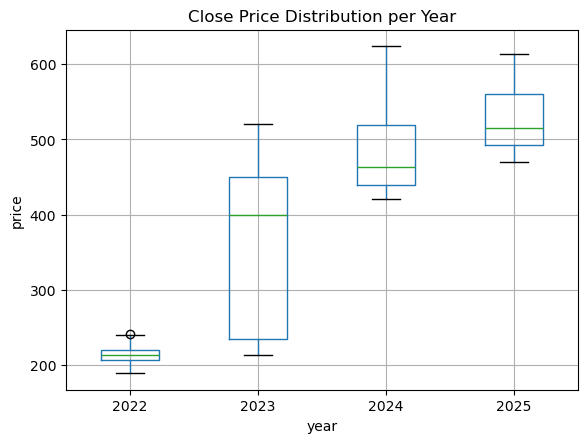

In [57]:
#box plot to detect the outlier
plt.figure()

df.boxplot(column='close', by='year')

plt.xlabel("year")
plt.ylabel("price")
plt.title("Close Price Distribution per Year")
plt.suptitle("")

plt.show()



In [58]:
# Normality test
statistic, p_value = stats.normaltest(df['close'].dropna())
print(f"\nNormality Test (Close Price):")
print(f"  Statistic: {statistic:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Is Normal? {'Yes' if p_value > 0.05 else 'No'}")


Normality Test (Close Price):
  Statistic: 6094.0068
  P-value: 0.0000
  Is Normal? No


### 7. Setup initial investment

In [61]:
#input the entry date
entry_date_str = input("\nEnter investment date (YYYY-MM-DD): ")
entry_date = pd.to_datetime(entry_date_str)
entry_date


# User input 2: How much money do you have?
initial_investment = float(input("Enter investment amount (NPR): "))
# Example: 100000

# User input 3: When do you want to exit?
exit_date_str = input("Enter exit date (YYYY-MM-DD) [default: 2025-12-31]: ")
if exit_date_str == '':
    exit_date_str = '2025-12-31'
exit_date = pd.to_datetime(exit_date_str)

print(f"\n✓ You want to invest on: {entry_date.date()}")
print(f"✓ You have: NPR {initial_investment:,.2f}")
print(f"✓ You want to exit on: {exit_date.date()}")


Enter investment date (YYYY-MM-DD):  2022-02-10
Enter investment amount (NPR):  20000
Enter exit date (YYYY-MM-DD) [default: 2025-12-31]:  



✓ You want to invest on: 2022-02-10
✓ You have: NPR 20,000.00
✓ You want to exit on: 2025-12-31


### 8. Find the historical prices

In [62]:

# Find entry price from historical data
if entry_date not in df.index:
    entry_date = df.index[df.index >= entry_date][0]
    print(f"\n⚠️  Adjusted to next trading day: {entry_date.date()}")

entry_price = df.loc[entry_date, 'close']
print(f"\n📈 Stock price on {entry_date.date()}: NPR {entry_price:.2f}")

# Find exit price from historical data
if exit_date not in df.index:
    exit_date = df.index[df.index <= exit_date][-1]
    print(f"⚠️  Adjusted to last trading day: {exit_date.date()}")

exit_price = df.loc[exit_date, 'close']
print(f"📈 Stock price on {exit_date.date()}: NPR {exit_price:.2f}")


📈 Stock price on 2022-02-10: NPR 218.20
📈 Stock price on 2025-12-31: NPR 492.00


### 9. Share calculation

In [64]:

# Calculate shares you can buy with your money
shares_owned = initial_investment / entry_price

print(f"\n🛒 SHARE PURCHASE CALCULATION")
print(f"  Your money: NPR {initial_investment:,.2f}")
print(f"  Price per share: NPR {entry_price:.2f}")
print(f"  Shares you can buy: {shares_owned:.0f}")


🛒 SHARE PURCHASE CALCULATION
  Your money: NPR 20,000.00
  Price per share: NPR 218.20
  Shares you can buy: 92


In [66]:

# Get investment period data
investment_period = df.loc[entry_date:exit_date].copy()
holding_days = len(investment_period)
years_held = (exit_date - entry_date).days / 365.25

print(f"\n⏱️  HOLDING PERIOD")
print(f"  From: {entry_date.date()}")
print(f"  To: {exit_date.date()}")
print(f"  Days: {holding_days}")
print(f"  Years: {years_held:.1f}")


⏱️  HOLDING PERIOD
  From: 2022-02-10
  To: 2025-12-31
  Days: 898
  Years: 3.9


### 10. Total dividend payout

In [72]:
 #Calculate Total Dividends (2022 - 2025)
# We take the first dividend entry for each year to represent that year's payout
yearly_divs = df[df['year'].isin([2022, 2023, 2024, 2025])].groupby('year')['dividend'].first()
total_div_per_share = yearly_divs.sum()
total_dividends_received = shares_owned * total_div_per_share
print(f"{total_dividends_received:.2f}")

11567.37


In [74]:
# 5. Final Calculations
final_stock_value = shares_owned * exit_price
total_portfolio_value = final_stock_value + total_dividends_received
total_return_pct = ((total_portfolio_value - initial_investment) / initial_investment) * 100

# Print Step-wise Results
print(f"Shares Bought: {shares_owned:.0f}")
print(f"Dividend per Share: NPR {total_div_per_share:.2f}")
print(f"Total Dividend Income: NPR {total_dividends_received:.2f}")
print(f"Final Portfolio Value: NPR {total_portfolio_value:.2f}")
print(f"Total Return: {total_return_pct:.2f}%")

Shares Bought: 92
Dividend per Share: NPR 126.20
Total Dividend Income: NPR 11567.37
Final Portfolio Value: NPR 56663.61
Total Return: 183.32%


In [76]:
#done upto total return calculation no visualization added